<a href="https://colab.research.google.com/github/georgeragan/MEDICAL_INSURANCE/blob/main/MEDICAL_INSURANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
#IMPORTING DEPENDENCIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
#LOADING THE DATASET
data=pd.read_csv("/content/insurance.csv")

In [4]:
#ANLAYSING THE DATASET
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.shape


(1338, 7)

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#distribution of variables

<ipython-input-13-d90445d09ba5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data["age"])


<Axes: ylabel='Density'>

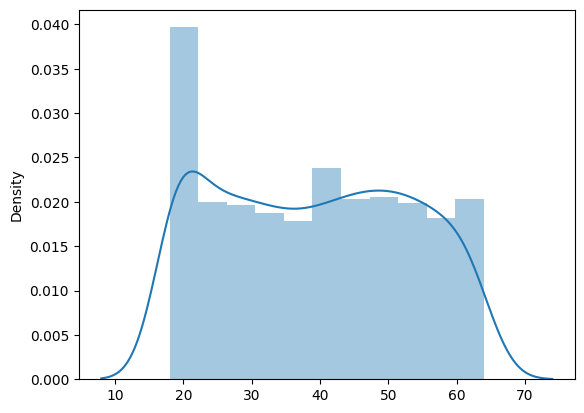

In [13]:
sns.distplot(x=data["age"])

<Axes: xlabel='sex', ylabel='count'>

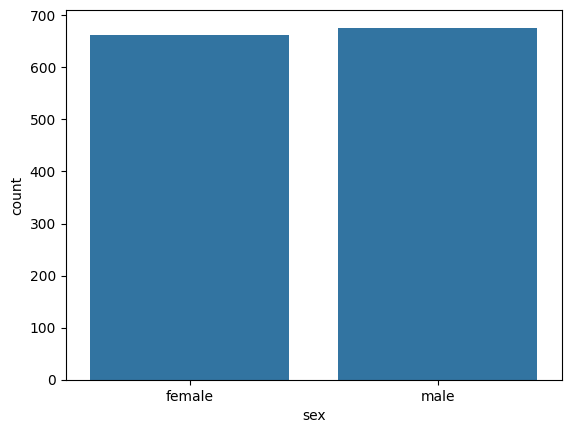

In [15]:
sns.countplot(data=data,x="sex")

<ipython-input-19-97382e094723>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data["bmi"])


<Axes: ylabel='Density'>

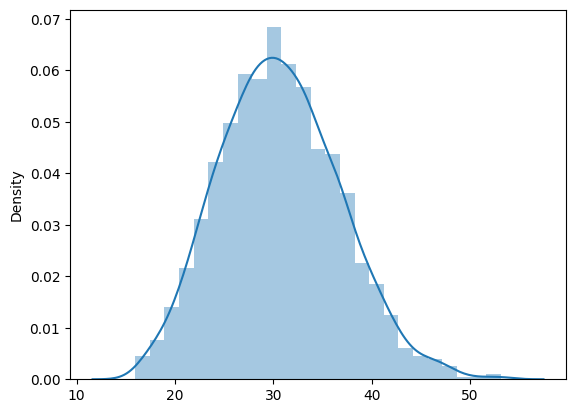

In [19]:
sns.distplot(x=data["bmi"])

<Axes: xlabel='children', ylabel='Count'>

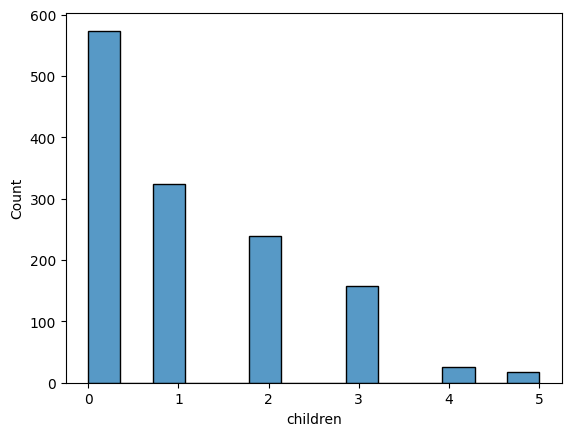

In [17]:
sns.histplot(data=data,x="children")

<Axes: xlabel='smoker', ylabel='count'>

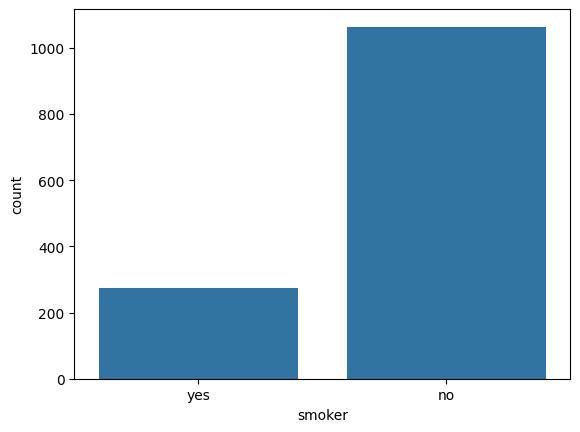

In [20]:
sns.countplot(x=data["smoker"])

<Axes: xlabel='region', ylabel='count'>

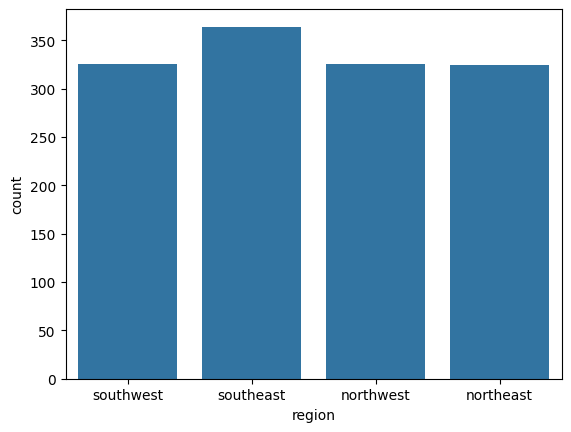

In [21]:
sns.countplot(x=data["region"])

<ipython-input-22-b5e239b66b42>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data["charges"])


<Axes: ylabel='Density'>

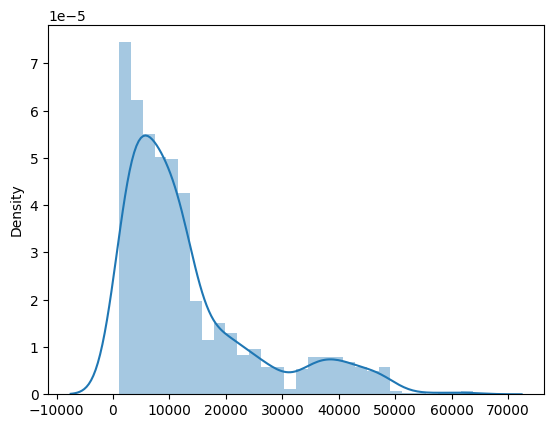

In [22]:
sns.distplot(x=data["charges"])

In [24]:
#ENCODEING
lb=LabelEncoder()
data["sex"]=lb.fit_transform(data["sex"])
data["smoker"]=lb.fit_transform(data["smoker"])
data["region"]=lb.fit_transform(data["region"])

In [25]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [61]:
X=data.iloc[::,:-1].values
Y=data.iloc[::,-1].values

In [62]:
models=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]

In [63]:
def model_compare():
  for model in models:
    cv_score=cross_val_score(model,X,Y,cv=5)
    print(model,cv_score.mean())

In [64]:
model_compare()

LinearRegression() 0.7472559473580954
DecisionTreeRegressor() 0.7119699219569094
RandomForestRegressor() 0.8341100695438257


In [65]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [66]:
model=RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [67]:
x_train_pred=model.predict(X_train)

In [68]:
r2_train=r2_score(Y_train,x_train_pred)

In [69]:
print("R SQUARED VALUE FOR TRAINING: ",r2_train)

R SQUARED VALUE FOR TRAINING:  0.9749704253561206


In [70]:
Y_pred=model.predict(X_test)
r2_test=r2_score(Y_test,Y_pred)
print("R SQUARED VALUE FOR TESTING: ",r2_test)

R SQUARED VALUE FOR TESTING:  0.8655178922259154


In [71]:
input_data=(28,	1,	33.000,	3,	0,	2)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

[4567.642486]
